In [1]:
!pip install ultralytics opencv-python matplotlib easyocr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42

In [2]:
import cv2
import matplotlib.pyplot as plt
import easyocr
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
model = YOLO("yolov8x.pt")  # Load a YOLOv8 pretrained model

100%|██████████| 131M/131M [00:00<00:00, 231MB/s]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



0: 640x480 1 car, 74.2ms
Speed: 2.6ms preprocess, 74.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


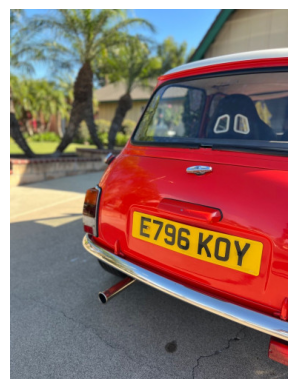

In [10]:
image_path = "/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/car_plate/car.jpg"  # Replace with your image file path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying
#image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
results = model(image_rgb)  # Run YOLO detection

# Show results
plt.imshow(image_rgb)
plt.axis("off")
plt.show()


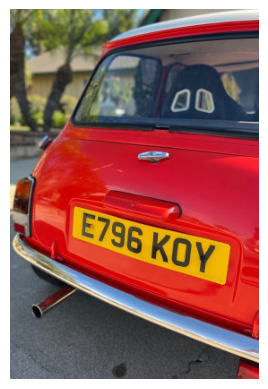

Detected Plate Number: ['E796', 'KOy']


In [11]:
reader = easyocr.Reader(['en'])  # Load OCR for English

for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box
        plate_crop = image_rgb[y1:y2, x1:x2]  # Crop plate area

        # Display cropped plate
        plt.imshow(plate_crop)
        plt.axis("off")
        plt.show()

        # Apply OCR
        text = reader.readtext(plate_crop, detail=0)
        print("Detected Plate Number:", text)


In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import easyocr

In [4]:
model = YOLO("yolov8x.pt")  # Load a YOLOv8 pretrained model

100%|██████████| 131M/131M [00:00<00:00, 262MB/s]


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
image_path = "/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/car_plate/car.jpg"

In [8]:
image = cv2.imread(image_path)

results = model.predict(image)

reader = easyocr.Reader(['en'])

result = results[0]
results




0: 640x480 1 car, 74.0ms
Speed: 3.6ms preprocess, 74.0ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 480)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

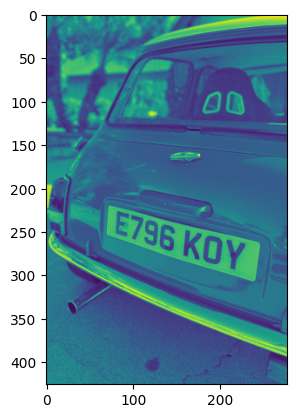

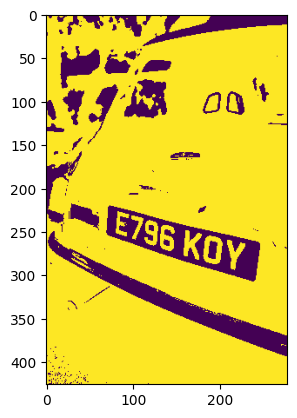

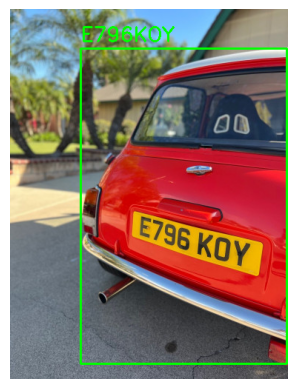

['E796KOY']


In [14]:
license_plates_text =[]
for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
    class_id = int(box.cls.tolist()[0])
    label = result.names[class_id]

    if label in ["car", "truck"]:

        license_plate_img = image[y1:y2, x1:x2] #crop the car and truck

        license_plate_img_gray = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)

        license_plate_img_binary = cv2.threshold(license_plate_img_gray, 128, 255, cv2.THRESH_BINARY_INV)[1]

        plt.imshow(license_plate_img_gray)
        plt.show()
        plt.imshow(license_plate_img_binary)
        plt.show()

        plate_text = reader.readtext(license_plate_img_binary,detail=0)

        plate_text_conmpine = "".join(plate_text)

        if plate_text_conmpine:
            license_plates_text.append(plate_text_conmpine)

            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, plate_text_conmpine, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()





In [15]:
if license_plates_text:
    print("Detected License Plates:")
    for i,plate_text in enumerate(license_plates_text, start=1):
        print(f"{i}. {plate_text}")
else:
    print("No license plates detected.")

Detected License Plates:
1. E796KOY


In [20]:
def detect_license_plates(image_path):
  model = YOLO("yolov8x.pt")  # Load a YOLOv8 pretrained model

  image = cv2.imread(image_path)

  results = model.predict(image)

  reader = easyocr.Reader(['en'])

  result = results[0]

  license_plates_text =[]
  for box in result.boxes:
      x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
      class_id = int(box.cls.tolist()[0])
      label = result.names[class_id]

      if label in ["car", "truck"]:

          license_plate_img = image[y1:y2, x1:x2] #crop the car and truck

          license_plate_img_gray = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2GRAY)

          license_plate_img_binary = cv2.threshold(license_plate_img_gray, 128, 255, cv2.THRESH_BINARY_INV)[1]

          plt.imshow(license_plate_img_gray)
          plt.show()
          plt.imshow(license_plate_img_binary)
          plt.show()

          plate_text = reader.readtext(license_plate_img_binary,detail=0)

          plate_text_conmpine = "".join(plate_text)

          if plate_text_conmpine:
              license_plates_text.append(plate_text_conmpine)

              cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
              cv2.putText(image, plate_text_conmpine, (x1, y1 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()


0: 352x640 2 cars, 53.3ms
Speed: 2.2ms preprocess, 53.3ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 640)


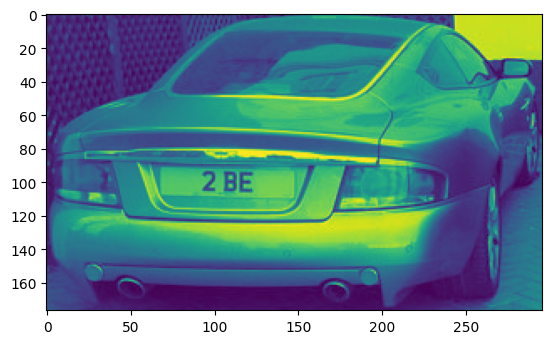

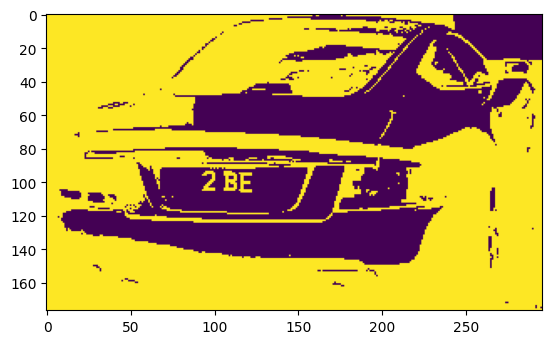

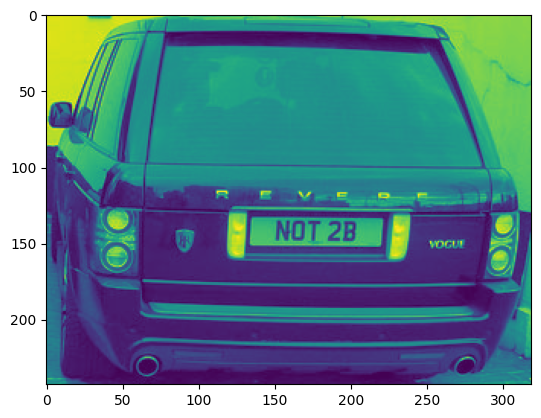

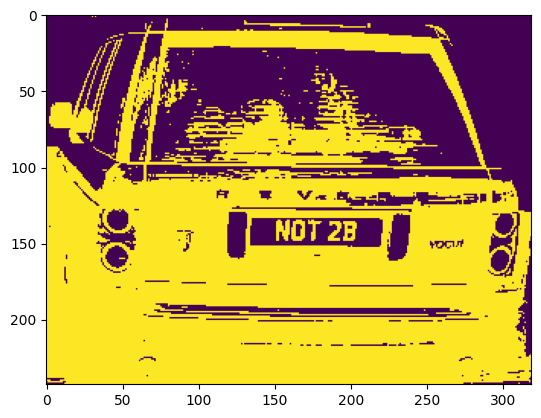

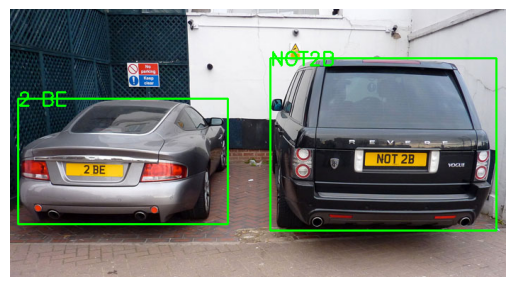

In [21]:
detect_license_plates('/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/car_plate/car2.jpg')

In [18]:
detect_license_plates('/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/car_plate/car_plate.ipynb')

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 5 persons, 1 bicycle, 1 bus, 59.8ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 49.3ms
Speed: 2.7ms preprocess, 54.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



0: 448x640 1 person, 1 car, 1 backpack, 56.9ms
Speed: 2.4ms preprocess, 56.9ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


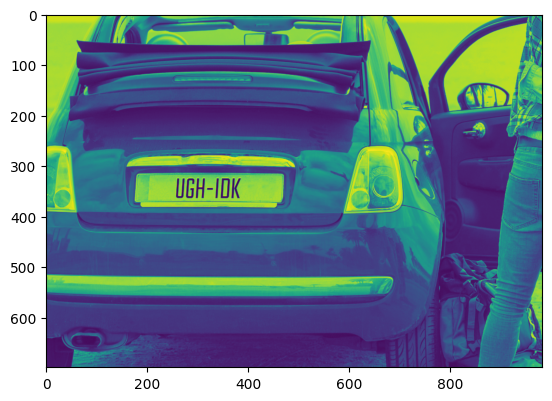

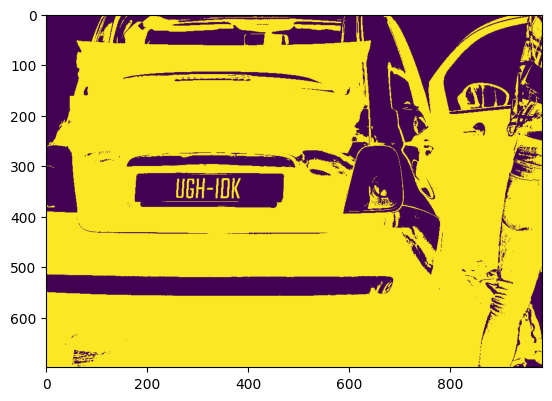

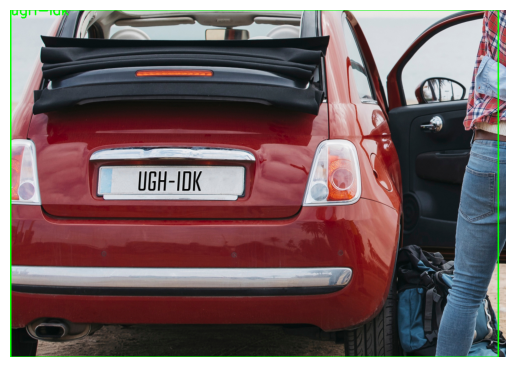

In [22]:
detect_license_plates('/content/drive/MyDrive/AI course/Computer_Vesion/Large_Vision_Models/car_plate/carr.jpg')